In [3]:
import sympy as sp
from sympy import Eq, latex, plot, plot_implicit, Matrix, simplify, expand, collect
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $16x^2-21y^2+3z^2-4xy-4xz+10yz$, проверить, что она определяет именно заданный многочлен.

In [15]:
x,y,z = sympy.symbols('x y z')
u = 16*x*x - 21*y*y + 3*z*z - 4*x*y - 4*x*z + 10*y*z
A = sympy.Matrix([
    [16, -2, -2],
    [-2,-21, 5],
    [-2, 5,  3],
])
X = Matrix([x, y, z])
quadr_matrix = X.T * A * X
quadr_form = sympy.expand(quadr_matrix[0])

display("Исходная квадратичная форма u:", u)
display("Квадратичная форма при помощи матрицы ", quadr_form)
display("X^T A X - u = ",quadr_form - u)

'Исходная квадратичная форма u:'

16*x**2 - 4*x*y - 4*x*z - 21*y**2 + 10*y*z + 3*z**2

'Квадратичная форма при помощи матрицы '

16*x**2 - 4*x*y - 4*x*z - 21*y**2 + 10*y*z + 3*z**2

'X^T A X - u = '

0

### Задание 2.
Заданы векторы  $e_1=(1, 0, 1)$, $e_2=(-1, 0, 1)$, $e_1=(0, 1, 0)$.
Вывести (используя цикл!) на экран матрицу квадратичной формы Задания 1 в новом базисе из векторов


1.   ($e_1$, $e_2$, $e_3$),
2.   ($e_1$, $e_2 - e_1$, $e_3$),
3.   ($e_1$, $e_2$, $e_3 - e_1$),
4.   ($e_1$, $e_2 - e_1$, $e_3 - e_1$),
5.   ($e_1 + e_2$, $e_2$, $e_3 + e_2$),

при этом в файл "task2.xlsx" записать на листы $A_1$, $A_2$, ... матрицы в новом базисе, а на листы  $P_1$, $P_2$, ... соответствующие матрицы перехода.

In [16]:
import sympy as sp
import pandas as pd
from google.colab import files

e1 = sp.Matrix([1, 0, 1])
e2 = sp.Matrix([-1, 0, 1])
e3 = sp.Matrix([0, 1, 0])
A = sp.Matrix([
    [16, -2, -2],
    [-2, -21, 5],
    [-2, 5, 3]
])
new_bases = [
    [e1, e2, e3],
    [e1, e2 - e1, e3],
    [e1, e2, e3 - e1],
    [e1, e2 - e1, e3 - e1],
    [e1 + e2, e2, e3 + e2]
]

with pd.ExcelWriter("task2.xlsx") as writer:
    for i, basis in enumerate(new_bases):
        P = sp.Matrix.hstack(*basis)
        A_new = P.T * A * P

        df_A = pd.DataFrame(A_new.tolist())
        df_P = pd.DataFrame(P.tolist())

        df_A.to_excel(writer, sheet_name=f'A{i+1}', index=False, header=False)
        df_P.to_excel(writer, sheet_name=f'P{i+1}', index=False, header=False)
        print(f"Матрица A{i+1} в новом базисе:")
        display(A_new)
        print(f"Матрица перехода P{i+1}:")
        display(P)
        print("\n")


files.download("task2.xlsx")

Матрица A1 в новом базисе:


Matrix([
[ 15, -13,   3],
[-13,  23,   7],
[  3,   7, -21]])

Матрица перехода P1:


Matrix([
[1, -1, 0],
[0,  0, 1],
[1,  1, 0]])



Матрица A2 в новом базисе:


Matrix([
[ 15, -28,   3],
[-28,  64,   4],
[  3,   4, -21]])

Матрица перехода P2:


Matrix([
[1, -2, 0],
[0,  0, 1],
[1,  0, 0]])



Матрица A3 в новом базисе:


Matrix([
[ 15, -13, -12],
[-13,  23,  20],
[-12,  20, -12]])

Матрица перехода P3:


Matrix([
[1, -1, -1],
[0,  0,  1],
[1,  1, -1]])



Матрица A4 в новом базисе:


Matrix([
[ 15, -28, -12],
[-28,  64,  32],
[-12,  32, -12]])

Матрица перехода P4:


Matrix([
[1, -2, -1],
[0,  0,  1],
[1,  0, -1]])



Матрица A5 в новом базисе:


Matrix([
[12, 10, 20],
[10, 23, 30],
[20, 30, 16]])

Матрица перехода P5:


Matrix([
[0, -1, -1],
[0,  0,  1],
[2,  1,  1]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Задание 3.
В цикле из файла "sem_14_task_3.xlsx" считать матрицы, вывести на экран каждую матрицу и ее собственные числа и собственные векторы.

In [18]:
import pandas as pd
from sympy import Matrix

uploaded = files.upload()
for key in uploaded.keys():
    print(f'Загружен файл {key}')

file_name = 'sem_14_task_3.xlsx'
df = pd.read_excel(file_name, sheet_name=None, index_col=False, header=None)


for sheet_name, data in df.items():
    matrix_data = data.to_numpy()
    M = Matrix(matrix_data)


    display(f"Матрица из листа '{sheet_name}':")
    display(M)

    eigenvals = M.eigenvals()
    eigenvects = M.eigenvects()


    display("Собственные числа:")
    for val, mult in eigenvals.items():
        display(f"λ = {val}, кратность = {mult}")


    display("Собственные векторы:")
    for vec in eigenvects:
        val, mult, basis = vec
        display(f"Для λ = {val}:")
        for v in basis:
            display(v)



Saving sem_14_task_3.xlsx to sem_14_task_3.xlsx
Загружен файл sem_14_task_3.xlsx


"Матрица из листа 'A1':"

Matrix([
[  7, 37, -37],
[ 37, -5,   5],
[-37,  5,  -5]])

'Собственные числа:'

'λ = -3*sqrt(1249)/2 - 3/2, кратность = 1'

'λ = -3/2 + 3*sqrt(1249)/2, кратность = 1'

'λ = 0, кратность = 1'

'Собственные векторы:'

'Для λ = 0:'

Matrix([
[0],
[1],
[1]])

'Для λ = -3/2 + 3*sqrt(1249)/2:'

Matrix([
[-3*sqrt(1249)/74 - 17/74],
[                      -1],
[                       1]])

'Для λ = -3*sqrt(1249)/2 - 3/2:'

Matrix([
[-17/74 + 3*sqrt(1249)/74],
[                      -1],
[                       1]])

"Матрица из листа 'A2':"

Matrix([
[  7,  30, -37],
[ 30, -72,  42],
[-37,  42,  -5]])

'Собственные числа:'

'λ = -sqrt(5437) - 35, кратность = 1'

'λ = -35 + sqrt(5437), кратность = 1'

'λ = 0, кратность = 1'

'Собственные векторы:'

'Для λ = 0:'

Matrix([
[1],
[1],
[1]])

'Для λ = -35 + sqrt(5437):'

Matrix([
[-sqrt(5437)/79 - 12/79],
[-67/79 + sqrt(5437)/79],
[                     1]])

'Для λ = -sqrt(5437) - 35:'

Matrix([
[-12/79 + sqrt(5437)/79],
[-sqrt(5437)/79 - 67/79],
[                     1]])

"Матрица из листа 'A3':"

Matrix([
[  7,  37, -44],
[ 37,  -5, -32],
[-44, -32,  76]])

'Собственные числа:'

'λ = 39 - 21*sqrt(13), кратность = 1'

'λ = 39 + 21*sqrt(13), кратность = 1'

'λ = 0, кратность = 1'

'Собственные векторы:'

'Для λ = 0:'

Matrix([
[1],
[1],
[1]])

'Для λ = 39 - 21*sqrt(13):'

Matrix([
[ 23/4 + 7*sqrt(13)/4],
[-27/4 - 7*sqrt(13)/4],
[                   1]])

'Для λ = 39 + 21*sqrt(13):'

Matrix([
[ 23/4 - 7*sqrt(13)/4],
[-27/4 + 7*sqrt(13)/4],
[                   1]])

"Матрица из листа 'A4':"

Matrix([
[  7,  30, -44],
[ 30, -72,  12],
[-44,  12,  76]])

'Собственные числа:'

'λ = 11/2 - sqrt(33817)/2, кратность = 1'

'λ = 11/2 + sqrt(33817)/2, кратность = 1'

'λ = 0, кратность = 1'

'Собственные векторы:'

'Для λ = 0:'

Matrix([
[2],
[1],
[1]])

'Для λ = 11/2 - sqrt(33817)/2:'

Matrix([
[117/136 + sqrt(33817)/136],
[ -185/68 - sqrt(33817)/68],
[                        1]])

'Для λ = 11/2 + sqrt(33817)/2:'

Matrix([
[117/136 - sqrt(33817)/136],
[ -185/68 + sqrt(33817)/68],
[                        1]])

"Матрица из листа 'A5':"

Matrix([
[76, 32, 0],
[32, -5, 0],
[ 0,  0, 0]])

'Собственные числа:'

'λ = 71/2 - sqrt(10657)/2, кратность = 1'

'λ = 71/2 + sqrt(10657)/2, кратность = 1'

'λ = 0, кратность = 1'

'Собственные векторы:'

'Для λ = 0:'

Matrix([
[0],
[0],
[1]])

'Для λ = 71/2 - sqrt(10657)/2:'

Matrix([
[81/64 - sqrt(10657)/64],
[                     1],
[                     0]])

'Для λ = 71/2 + sqrt(10657)/2:'

Matrix([
[81/64 + sqrt(10657)/64],
[                     1],
[                     0]])

### Задание 4.
Привести квадратичную форму с матрицей
$$
\left[\begin{matrix}-645 & -12 & -960\\-12 & 3 & 9\\-960 & 9 & -1205\end{matrix}\right]
$$
к каноническому виду с помощью перехода к новому базису из собственных векторов.

Вывести на экран матрицу перехода к новому базису, матрицу квадратичной формы в новом базисе и квадратичную форму в старом и новом базисе (в виде многочлена от переменных $x$, $y$, $z$).

In [19]:
A = Matrix([
    [-645, -12, -960],
    [-12, 3, 9],
    [-960, 9, -1205]
])
eigenvalues = A.eigenvals()
eigenvectors = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in eigenvectors]).T
A_canon = P.T * A * P
X = Matrix([x, y, z])
display(Latex(latex(P)))
Q_old = X.T * A * X
display(Latex(latex(Q_old[0])))
Q_new = X.T * A_canon * X
display(Latex(latex(Q_new[0])))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 5*.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

<IPython.core.display.Latex object>

Eq(x**2/169 + y**2/25, 1)

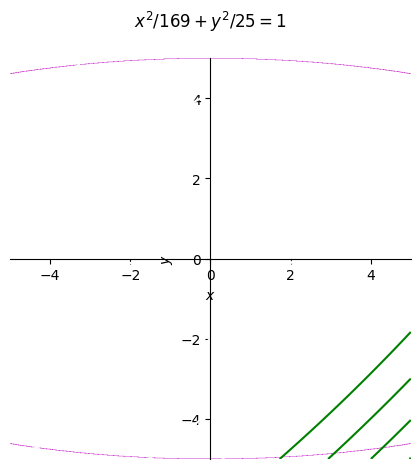

In [20]:
from sympy.abc import X, Y, Z, x,y,z

A3 = Matrix([
    [97, -72, 241],
    [-72, 97, -266],
    [241, -266, -3452]
])
X3 = sp.Matrix([x, y, 1])
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)
display(eq3)
alpha = sympy.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
display(P)
A3_new = P.T * A3 * P
A3_new.simplify()
display(A3_new)

X3 = Matrix((X, Y, 1))
simplify(expand((X3.T * A3_new * X3)[0]))
X3_new = Matrix((X - A3_new[0, 2] / A3_new[0, 0],
                 Y - A3_new[1, 2] / A3_new[1, 1],
                 1))
eq3_new = simplify(expand(X3_new.T * A3_new * X3_new))[0]
display(Latex(f'X_{{3\ new}} = {latex(X3_new)},\ \
eq_{{3\ new}} = {latex(eq3_new)}'))
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new / (-free) + 1
Eq(eq3_last, 1)
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(expand(eq3_last_xy))
p = plot_implicit(eq3, line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                   title=f'{latex(eq3_last_xy, mode="inline")}\n', adaptive = False,
                    show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), line_color='m',
                       aspect_ratio=(1, 1), show=False))
p.show()


### Задание 6*.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

Eq(x**2 + 2*x*y - 4*x + y**2 + 4*y - 4, 0)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

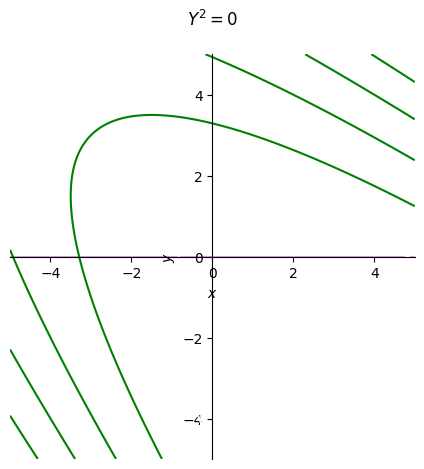

In [50]:
import sympy
from sympy import Eq, latex, plot_implicit, Matrix, simplify, expand, cos as Cos, sin as Sin
from sympy.abc import x, y, X, Y
from IPython.display import Latex

A3 = Matrix([
    [1, 1, -2],
    [1, 1, 2],
    [-2, 2, -4]
])

X3 = Matrix([x, y, 1])

eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)
display(eq3)


alpha = sympy.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2

P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
display(Latex(f'Матрица поворота P = {latex(P)}'))


A3_new = simplify(P.T * A3 * P)
display(Latex(f'Матрица квадратичной формы в новом базисе A\' = {latex(A3_new)}'))

X3_new = Matrix([X, Y, 1])
eq3_new = simplify(expand(X3_new.T * A3_new * X3_new))[0]
display(Latex(f'Уравнение в новых координатах: {latex(eq3_new)}'))


if A3_new[1, 1] == 0:
    display(Latex('Тип  кривой: парабола'))
    if A3_new[0, 0] != 0:
        x_expr = sympy.solve(eq3_new, X)[0]
        eq_canon = simplify(eq3_new.subs(X, x_expr))
        p = eq_canon.coeff(Y**2, 1) / 2
        eq_canon_parabola = Eq(Y**2, 2 * p * X)
    else:

        y_expr = sympy.solve(eq3_new, Y)[0]
        eq_canon = simplify(eq3_new.subs(Y, y_expr))
        p = eq_canon.coeff(X**2, 1) / 2
        eq_canon_parabola = Eq(X**2, 2 * p * Y)
    display(Latex(f'Каноническое уравнение параболы: {latex(eq_canon_parabola)}'))
else:
    display(Latex('Тип кривой: эллипс или гипербола'))
    x0 = -eq3_new.coeff(X, 1) / (2 * A3_new[0, 0])
    y0 = -eq3_new.coeff(Y, 1) / (2 * A3_new[1, 1])
    eq_canon = simplify(eq3_new.subs({X: X + x0, Y: Y + y0}))
    display(Latex(f'Каноническое уравнение: {latex(eq_canon)}'))


p = plot_implicit(eq3, line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                  title=f'{latex(eq_canon_parabola, mode="inline")}\n',
                  adaptive=False, show=False)
p.extend(plot_implicit(eq_canon_parabola, (x, -15, 15), line_color='m',
                       aspect_ratio=(1, 1), show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

In [7]:
x, y, z = sp.symbols('x y z')

a = 69591
b = 60 * sp.sqrt(91)
c = 2454 * sp.sqrt(11)
d = 20900
e = -180 * sp.sqrt(1001)
f =  29509

A = sp.Matrix([
    [a, b/2, c/2],
    [b/2, d, e/2],
    [c/2, e/2, f]
])
display(A)

eigenvects = A.eigenvects()

P = Matrix.hstack(*[vec[2][0].normalized() for vec in eigenvects])
P_ = P.inv()

A_can = P_ * A * P
display(A_can)

x, y, z = sp.symbols('x y z')
X = sp.Matrix([x, y, z])
quadratic_form = X.T * A_can * X
display(quadratic_form[0])


Matrix([
[        69591,    30*sqrt(91),  1227*sqrt(11)],
[  30*sqrt(91),          20900, -90*sqrt(1001)],
[1227*sqrt(11), -90*sqrt(1001),          29509]])

Matrix([
[20000,     0,     0],
[    0, 30000,     0],
[    0,     0, 70000]])

20000*x**2 + 30000*y**2 + 70000*z**2